# A LYRICAL EVOLUTION: 

### An Investigation of the Cultural Lexicon & Historical Relevance of U.S. Popular Music from 1958 - Present

---

**An NLP based Capstone Project & Final Report Created By:**

Ben Smith, Chris Teceno, Jerry Nolf & Rachel Robbins-Mayhill
Codeup   |   Innis Cohort   |   June 2022  

<img src="dataset-cover.png">

## Project Goal
This project aimed to investigate the patterns of song lyrics across decades using Time Series Analysis and Natural Language Processing techniques including Topic Modeling, Sentiment Analysis, and Term Frequency.  The data used was collected from a Kaggle data set of the Billboard Top 100 Songs from 1958 to 2021 and lyrics pulled through web-scraping from the Genius.com API. We believe the lyrics of popular songs could be used for historical analysis using exploratory methods and hypothesis testing to identify changing societal trends in relationships, technology, sexuality, and vulgarity. Furthermore, we believe we can predict the decade the song first appeared on the Top 100 using features and machine learning methods.

## Project Description

Songs are powerful tokens: they can soothe, validate, ignite, confront, and educate us – among other things. Like time capsules, they are captured for eternity. The slang and language used are often indicative of the times, and you can probably recall exactly when a song was made based on what is mentioned. Arguably, music is a catalyst for societal and cultural evolution like no other art form. It has been causing controversy and societal upheaval for decades, and it seems with every generation there’s a new musical trend that has the older generations shaking their heads. 

For centuries, songs have been passed down through generations, being sung as oral histories. However, with advancements of the 20th century, technology has made the world of music a much smaller place and, thanks to cheap, widely-available audio equipment, songs are now distributed on a much larger scale, having a farther-reaching impact, and a more permanent place in history. 

This project aimed to combine the record of lyrical history and technological advancements to evaluate the changes in the cultural lexicon and societal evolution over the last 50+ years. Using machine learning and natural language processing methodologies we investigated the topics prevalent in songs of the past, predicted the decade in which they were written, and conducted historical analysis through exploration to identify changing societal trends in relationships, technology, sexuality, and vulgarity.

<img src='Billboard.png' width="350" height="350" align="left"/> To do this, we acquired a [Kaggle](https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs) data set of the Billboard Top 100 Songs from its inception in 1958 to present. We then utilized the [Genius.com](https://genius.com/) API and LyricGenius Library to conduct web scraping to pull the lyrics for the specified songs which became the corpus for this project. After acquiring and preparing the corpus, our team conducted natural language processing exploration utilizing methods such as topic modeling, word clouds, and bigrams. We employed multiclass classification methods to create multiple machine learning models. The end goal was to create an NLP model that accurately predicted the decade a song first appeared on the Billboard Top 100 chart, based on the words and word combinations found in the lyrics of the song.

We choose the Billboard Hot 100 song list as a focus because it is the music industry standard record chart in the United States for song popularity, published weekly by Billboard magazine. It provides a window into popular culture at a given time, by providing chart rankings of songs that were trending on sales, airplay, and now streaming for that week in the United States. It is arguably the best historical record of the impact of specific popular songs over time.

## Initial Thoughts & Hypothesis

The initial hypothesis of this project was that we could use the top songs of each decade in conjunction with topic modeling to identify unique words or topics which could be used as features to accurately predict the decade a song was on the Billboard Top 100 using machine learning. The thought behind this was that popular songs have been the historians of a unique lexicon, specific to their place in time. We believe the lyrics of popular songs could be analyzed through machine learning to identify societal trends in relationships, technology, sexuality, and vulgarity.

## Initial Questions

The focus of this project is on identifying the decade a song first appeared on the Billboard Top 100. Below are some of the initial questions this project looked to answer throughout the Data Science Pipeline.
 
##### Data-Focused Questions
- What are the most frequently occuring words?
- What are the most frequently occuring bigrams (pairs of words) by each decade?
- What decade did the song first appear in the top 100?
- What topics are most unique to each decade?
- Is there a correlation between sentiment and decade?
- How do topics, such as violence, sexual explicitness, technology references, or relationship references, change over time?
- How does foreign language usage change over time?

## Key Findings

The key findings for this presentation are available in slide format by clicking on the [Final Slide Presentation](https://www.canva.com/design/DAFCXoeG7z0/jNCtQkQFqyOTWS5Ckg8Xuw/view?utm_content=DAFCXoeG7z0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton).


TBD.......

==========================================================================================================================================================

## I. ACQUIRE
To acquire the data for this project, we utilized a [Kaggle](https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs) data set of the Billboard Top 100 Songs from its inception in 1958 to present. 

The dataset provided:
- date song was on the Billboard Top 100 
- rank of song  
- title
- artist name
- rank of song the previous week
- rank of song at it's peak week
- number of weeks song was on the Top 100  

We selected only unique artists and songs, to ensure there were no duplicates, keeping only the earliest appearance on the chart to standardize the selections in the event of multiple appearances. Following song selection with the Kaggle dataset, we then obtained an API token to utilize the [Genius.com](https://genius.com/) API and [LyricGenius Library](https://pypi.org/project/lyricsgenius/) to conduct web scraping to pull the lyrics for the specified songs which became the corpus for this project.

The acquired data can be easily accessed via a [Google Drive .csv file](https://drive.google.com/file/d/1S0dJ7-5x8NIgt1LranE3UETgl_JvukGT/view). 

### Note about imports: 
Imports for this project are added in the sections in which they are required.

In [1]:
# import for acquisition
import os
import json
import requests
import draft_prepare as prep
import draft_explore as explore
import draft_model as model


# import for data manipulation
import pandas as pd
import numpy as np
from typing import Dict, List, Optional, Union, cast

# import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Reading from csv...


In [2]:
# acquire data from .csv saved and processed using functions found in acquire.py
df = pd.read_csv('songs_0526.csv')
df.head()

,Unnamed: 0,title,artist,date,lyrics
0,2,#1,Nelly,2001-10-20,#1 LyricsUh uh uh I just gotta bring it to the...
1,4,#9 Dream,John Lennon,1974-12-21,#9 Dream Lyrics[Verse 1] So long ago Was it in...
2,5,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,..."
3,6,#SELFIE,The Chainsmokers,2014-03-15,#SELFIE Lyrics[Verse 1] When Jason was at the ...
4,7,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...


In [3]:
# obtain number of columns and rows for original dataframe
df.shape

(23762, 5)

### The Original DataFrame Size: 
- 23,762 rows, or documents, and 5 columns.

==========================================================================================================================================================

## II. PREPARE

After data acquisition, the dataframe was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the 'get_data' function saved within the prepare.py file inside the [Lyrical Evolution](https://github.com/CBRJ-Lyrical-Metrics/song-lyrics-capstone) repository on GitHub. The function takes in the original acquire dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Cleaning: 
    - Make all text lowercase
    - Normalize, encode, and decode to remove accented text and special characters
    - Expand abbreviated contractions
    - Lemmatize words to acquire base words
    - Remove stopwords
    - Convert date to DateTime format
    - Remove song part identifiers ('lyrics' 'verse', 'chorus', 'hook', 'embed')
    
---   
- Address missing values, data errors, unnecessary data, and unclear values:
    - No null values
    - Data Errors : The API returned lyrics that were not the expected song's lyrics 
        - Mannually checking some
        Compared title, if they match after cleaning manipulation, 
---    
- Create feature engineered columns:
    - Decade 
    - Chorus Count
    - Verse Count
    - Verse/Chorus Ratio
    - Word Count
    - Unique Words per Song
    - Unique Words per Decade
    - Bigrams
    - Trigrams
    
- Apply Natural Language Processing (NLP Methods:
    - Topic Modeling
    - Sentiment Analysis
    
---
- Split corpus into train, validate, and test samples 


**Note on Splitting Data:**



**Note on Missing Value Handling:**
The missing value removal equated to removing ______ observations/documents, which was about ___   \% of the data set. It still left _______ observations, a substantial number. If given more time with the data, it is recommended to investigate other ways to impute the missing data.

### Topic Modeling

A way of identifying major topics found in large quantities of text data. We used the Latent Dirichlet Allocation to create groupings of labeled text within the songs to obtain common topics. (Cluster into similar groups and label each group). We obtianed 20 original topics, combined into 17. From there, pulled categories that were related (vice - violence, sex money/ relationship - affection, breakups, heartache, jealousy, sex)

### Sentiment Analysis

Utilized sklearn.decomposition package. Examined the change in average sentiment score over tiem by looking at a rolling 5 year avereage and average by decade. Divided sentiment score into 5 categories _________. Looked at what portion of the total taken up by each category adn how it changed over time. 

---

## Results of Data Preparation

In [4]:
# import for prepare
import draft_prepare
import unicodedata
import re

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from time import strftime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from collections import Counter

In [5]:
# apply the data preparation observations and tasks to clean the data using the prep_data function found in the prepare.py
df = prep.get_data()
# view first few rows of dataframe
df.head()

Reading from csv...


,title,artist,date,lyrics,raw_lyrics,decade,character_count,word_count,unique_words,unique_words_count,sentiment,sentiment_category,place_words,chorus_count,verse_count,verse_chorus_ratio,pre_chorus_count,outro_count,bridge_count,hook_count,bigrams,trigrams,topic_name
0,#1,Nelly,2001-10-20,uh uh uh got bring attention dirty better watc...,#1 LyricsUh uh uh I just gotta bring it to the...,2000,2014,363,wait france uhh baby two karat rapper name pan...,228,0.9915,very positive,[hook] [hook] [hook],0,0,0.000000,0,0,0,3,"[('uh', 'uh'), ('uh', 'uh'), ('uh', 'got'), ('...","[('uh', 'uh', 'uh'), ('uh', 'uh', 'got'), ('uh...",sex
1,#9 Dream,John Lennon,1974-12-21,long ago dream dream know yes know seemed real...,#9 Dream Lyrics[Verse 1] So long ago Was it in...,1970,842,135,yes around started go something two believe wa...,49,0.9169,very positive,[verse 1] [pre-chorus 1] [chorus] [verse 2] [p...,2,2,1.000000,2,1,0,0,"[('long', 'ago'), ('ago', 'dream'), ('dream', ...","[('long', 'ago', 'dream'), ('ago', 'dream', 'd...",love
2,#Beautiful,Mariah Carey Featuring Miguel,2013-05-25,ah ah beautiful ah ah beautiful hop back bike ...,"#Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,...",2010,768,129,yes always hair take hop like care baby darlin...,54,0.9989,very positive,[intro: mariah carey] [verse 1: miguel] [choru...,2,2,1.000000,0,1,0,0,"[('ah', 'ah'), ('ah', 'beautiful'), ('beautifu...","[('ah', 'ah', 'beautiful'), ('ah', 'beautiful'...",lost
3,#SELFIE,The Chainsmokers,2014-03-15,jason table kept seeing look girl think make j...,#SELFIE Lyrics[Verse 1] When Jason was at the ...,2010,954,172,wait living xx look know texting vodka need on...,100,0.9218,very positive,[verse 1] [drop 1] [verse 2] [drop 2] [verse 3...,0,3,0.000000,0,0,0,0,"[('jason', 'table'), ('table', 'kept'), ('kept...","[('jason', 'table', 'kept'), ('table', 'kept',...",violence
4,#thatPOWER,will.i.am Featuring Justin Bieber,2013-04-06,oh alive alive alive oh fly fly fly oh alive a...,#thatPOWER Lyrics[Instrumental break] [Pre-Ch...,2010,1238,208,whatever attire kill alive hate better stronge...,77,0.9984,very positive,[instrumental break] [pre-chorus: justin biebe...,3,2,0.666667,3,1,1,0,"[('oh', 'alive'), ('alive', 'alive'), ('alive'...","[('oh', 'alive', 'alive'), ('alive', 'alive', ...",sex


In [6]:
df.shape

(23762, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23762 entries, 0 to 23761
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               23762 non-null  object        
 1   artist              23762 non-null  object        
 2   date                23762 non-null  datetime64[ns]
 3   lyrics              23762 non-null  object        
 4   raw_lyrics          23762 non-null  object        
 5   decade              23762 non-null  int64         
 6   character_count     23762 non-null  int64         
 7   word_count          23762 non-null  int64         
 8   unique_words        23762 non-null  object        
 9   unique_words_count  23762 non-null  int64         
 10  sentiment           23762 non-null  float64       
 11  sentiment_category  23762 non-null  object        
 12  place_words         23762 non-null  object        
 13  chorus_count        23762 non-null  int64     

## Prepared DataFrame Size: 
- 23,762 rows, or documents, and 23 columns.

---

### PREPARE - SPLIT  ( Adjustments will be made prior to the final)

In [8]:
# import for split
from sklearn.model_selection import train_test_split

After preparing the corpus, it was split into 3 samples; train, validate, and test using:

- Random State: 42
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the split_data function saved within the prepare.py file inside the [_____](_________) repository on GitHub.

In [9]:
# split the data into train, validate, and test using the split_data function found in the prepare.py
train, validate, test = prep.split_data(df)
# obtain the number of rows and columns for the splits
train.shape, validate.shape, test.shape

((13306, 23), (5703, 23), (4753, 23))

==========================================================================================================================================================

## III. EXPLORE

In [10]:
# import for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import style
import draft_explore as explore

After acquiring and preparing the corpus, exploration was conducted. All univariate exploration was completed on the entire cleaned corpus in the workbook for this project. For the purpose of the final report, only the target variable will be displayed in order to reduce noise and provide focused context for the project. Following univariate exploration, the split sets (train, validate, and test samples) were utilized thorugh modeling, where only the train set was used for bivariate and multivariate exploration to prevent data leakage.

---

### EXPLORATION QUESTIONS

All bivariate exploration was conducted on the train corpus to prevent data leakage. The initial questions and univariate exploration guided the bivariate exploration.

#### EXPLORE QUESTIONS

### QUESTION 1: How has Sentiment Changed Over Time

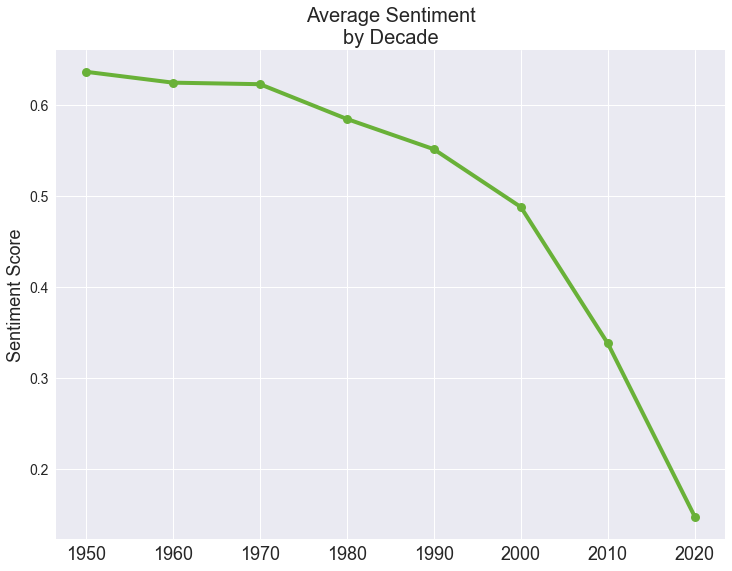

In [11]:
explore.sentiment_lineplot(df)

In [12]:
# Hypothesis Testing - Mann-Whitney 

#### ANSWER 1: 
Sentiment was fairly steady in the 60's and 70's, followed by a gradual downward trend which becomes sharper in the 2000's and 2010's. The downward trend is due to an increase in very negative sentiment and decrease in very positivesentiment while mid-range sentiment stays contstant. 

---

### QUESTION 2: What Topics are Most Prevalent Across the Decades?

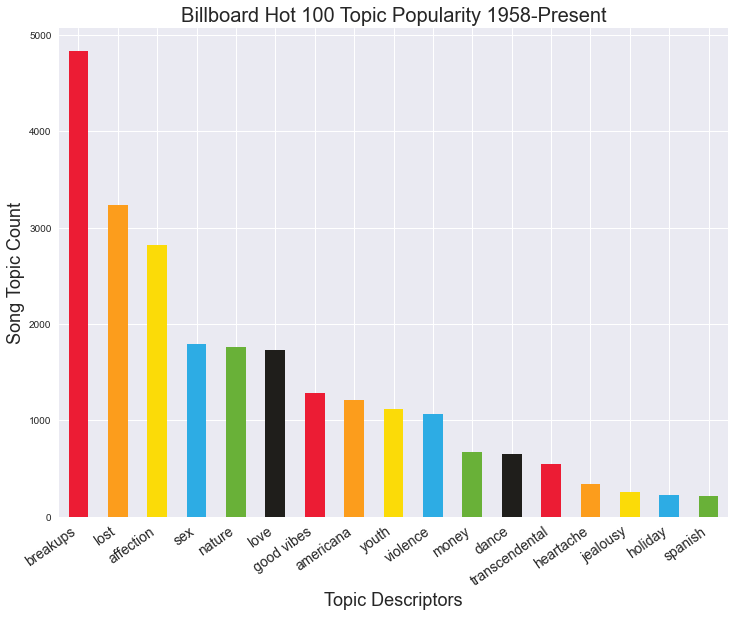

In [13]:
# Visualization
explore.topic_popularity(df)

#### ANSWER 2: 
Breakups are by far the most popular topics in songs, followed by being lost in life, then affection, sex, and nature.

---

### QUESTION 3: How Do Relationship Topics Change Over the Decades?   

<Figure size 936x720 with 0 Axes>

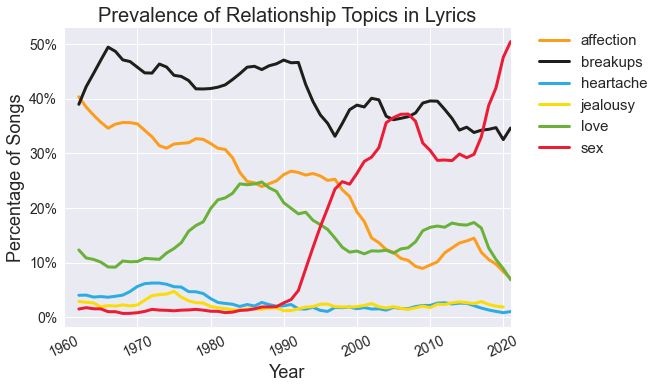

In [14]:
explore.relationship_line(df)

Observation:
There appears to be an inverse relationship between affection and sex, with the topic of affection decreaseing in prevalence over time, and the topic of sex increasing in usage. 

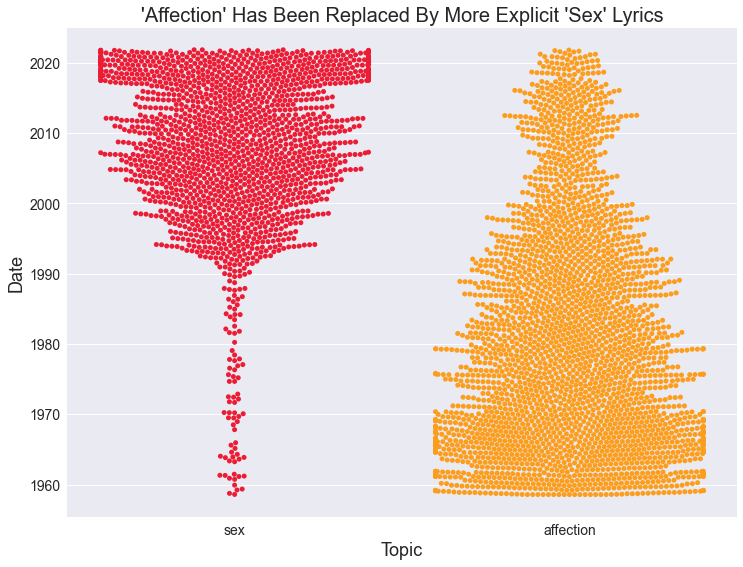

In [15]:
# visualization
explore.touch_swarm(df)

In [16]:
# Hypothesis Testing - correlation

#### ANSWER 3: 
While most relationship topics appear constant, affection and sex have an inverse relationship. 

---

### QUESTION 4: How Do Vice Topics Change Over the Decades?   

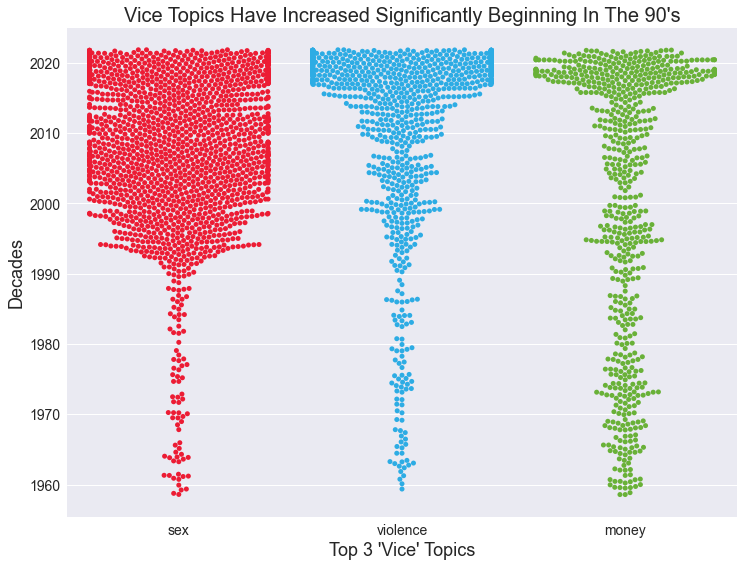

In [17]:
explore.vice_swarm(df)

#### ANSWER 4: 
After 1990 sex became extremely popular in lyrics, then around 2015 violence and money exploded as well. 

In [18]:
# Hyppthesis Testing  - Correlation of each topic over time

---

### QUESTION 5: What Happened to the Love?

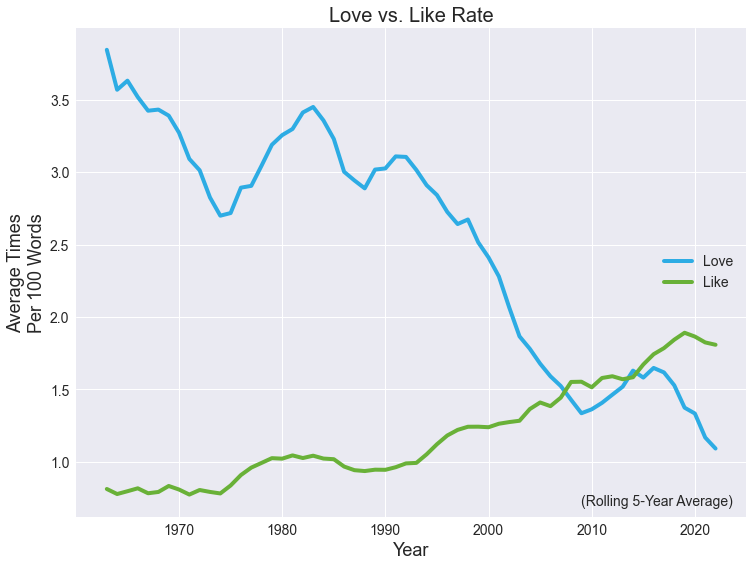

In [19]:
# Visualization
explore.love_vs_like_lineplot(df)

In [20]:
# Hypothesis Testing

#### ANSWER 5: 
Love went from most common word in the early decades, to lower in the top 5, then out of the top 5 and replaced with like. 

---

### EXPLORATION SUMMARY





==========================================================================================================================================================

In [21]:
### SPLIT???

## IV. MODEL

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer


### Focus of Model Metrics
The target variable, Decade, is a categorical variable, therefore classification machine learning algorithms were used to fit to the training corpus and the models were evaluated on the validate corpus. The metrics used for model evaluation was accuracy, due to the multi-class classification approach. In other words, the model was optimized for identifying true positives, false positive, true negatives, and false negatives, therefore we focused on creating a model with the highest accuracy score from train to validate. 

In [23]:
# # get fresh data
# df = pd.read_csv('songs_0526.csv', index_col=0)
# # prep for model
# df = prep.model_clean(df)

In [24]:
# get the data
df = prep.get_data()
# remove incomplete decades (1950, 2020)
df = df[(df.decade != 1950) & (df.decade != 2020)]

Reading from csv...


### Set X & y
As mentioned above, two different approaches were taken to prepare the data for modeling. Feature engineering was done for exploratory analysis and even more for modeling. This however did not result in a significant improvement in the accuracy of the model. Therefore, the data was prepared for modeling by using TF-IDF vectorization which takes into account the word count in each file vs word count in the entire corpus. Below is how this was performed:

In [25]:
# make vectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["lyrics"])
y = df["decade"]

### Set Baseline

A baseline prediction was set by using the mode for decade. This gave us a baseline accuracy of 20.6%. We will evaluate the accuracy of our models in comparrison to that baseline.

### Condsider Feature Engineering
First lets look at the models with the lower accuracy, this is the df using feature engineering not including TF-IDF. 
The following were adjustable:
- scale or not scale
- use only unique bigrams as features or use all numeric features

### Observation of models with feature engineering:

### Consider TF-IDF

#### The Type of Classification models built were 
- Decision Tree
- Random Forest
- Logistic Regression

The models were run with many trials, adjusting parameters and algorithms to find the best performing model.  

- All Logistic Regression models appeared to be overfit based upon their high performance on train accuracy compared to the significant drop off on validate accuracy.
    - This is in part due to the use of TF-IDF which analyzes each word in the train corpus and does not remove attributes.
- In general all models outperformed baseline, which had  ___ accuracy on train and ___ accuracy on validate.
- The Logistic Regression Model that performed best had a c of 1000 and solver of 'lbfgs', with train accuracy of 98% and validate accuracy of 61% performing 19% better than baseline with validate. It was then applied to the un-seen test data with an accuracy of 56%.

---

### MODEL - DECISION TREE

In [26]:
results = model.run_decision_tree_models(df)
results.drop(columns='test_accuracy').head(1) # show baseline

,model_number,model_type,train_accuracy,validate_accuracy,better_than_baseline,max_depth,baseline_accuracy
0,baseline,baseline,0.205677,0.20559,False,NaN,NaN


In [27]:
results.drop(columns='test_accuracy').sort_values('validate_accuracy', ascending=False).head(3)

,model_number,model_type,train_accuracy,validate_accuracy,better_than_baseline,max_depth,baseline_accuracy
6,6,DecisionTreeClassifier,0.411755,0.312324,True,10,0.20559
7,7,DecisionTreeClassifier,0.999759,0.300694,True,100,0.20559
5,5,DecisionTreeClassifier,0.321058,0.295629,True,5,0.20559


The Decision Tree model that performed the best on train & validate set had max_depth of 2, with 51% accuracy on train, and 45% accuracy on validate, so that model will be isolated below in the event it is the best performing model to be applied to the test (unseen) dataset. 

---

### Model - RANDOM FOREST

In [28]:
results2 = model.run_random_forest_models(df)
results2.drop(columns='test_accuracy').sort_values('validate_accuracy', ascending=False).head(3)

,model_number,model_type,train_accuracy,validate_accuracy,better_than_baseline,max_depth,min_samples_leaf,criterion,baseline_accuracy
87,94,RandomForest,0.936319,0.404802,True,100,2,gini,0.20559
88,95,RandomForest,0.923776,0.399362,True,100,2,entropy,0.20559
90,97,RandomForest,0.8215,0.391296,True,100,3,entropy,0.20559


The Random Forest model that performed the best on train & validate set had max_depth of 100 and min_sample_leaf of 1, with 99%  accuracy on train, and 48% accuracy on validate, so that model will be isolated below in the event it is the best performing model to be applied to the test (unseen) dataset. 

---

### Model - LOGISTIC REGRESSION

In [29]:
results3 = model.run_logistic_reg_models(df)
results3.drop(columns='test_accuracy').sort_values('validate_accuracy', ascending=False).head(3)

,model_number,model_type,train_accuracy,validate_accuracy,better_than_baseline,baseline_accuracy,solver,C
11,116,LogisticRegression,0.69832,0.457325,True,0.20559,lbfgs,1
18,123,LogisticRegression,0.699043,0.457137,True,0.20559,newton-cg,1
25,130,LogisticRegression,0.699043,0.457137,True,0.20559,sag,1


Evaluating the model with the validate data set was done in the function above for comparrison. The Logistic Regression Model that performed best had a c-statistic of 1000 with a train accuracy of 99% and validate accuracy of 61% performing 19% better than baseline on unseen (validate) data.

---

### Best Performing Model Applied to Test Data (Unseen Data)

In [30]:
results3.sort_values('validate_accuracy', ascending=False).head(1)

,model_number,model_type,train_accuracy,validate_accuracy,test_accuracy,better_than_baseline,baseline_accuracy,solver,C
11,116,LogisticRegression,0.69832,0.457325,0.448897,True,0.20559,lbfgs,1


This model is expected to perform around 45% accuracy in the future on data it has not seen, given no major changes in the data source, which is better than the baseline prediction.

==========================================================================================================================================================

## V. CONCLUSION

This project aimed to investigate the patterns of song lyrics across decades using Time Series Analysis and Natural Language Processing techniques including Topic Modeling, Sentiment Analysis, and Term Frequency using a Kaggle data set of the Billboard Top 100 Songs from 1958 - 2021 and lyrics pulled from the Genius.com API. We believed the lyrics of popular songs could be used for historical analysis using exploratory methods and hypothesis testing to identify changing societal trends in relationships, technology, sexuality, and vulgarity. Furthermore, we beleive we can predict the decade the song appeared on the Top 100 using features and machine learning methods.

Through exploration and modeling, we determined _____________________.

This information could be usiful in various contexts:
- Anthropologic and Sociologic Academic Analysis
- Marketing Analysis for companies associated with the music industry

### RECOMMENDATIONS

### NEXT STEPS

TBD with more exploration

==========================================================================================================================================================